## Imports, data load, metric function definition

In [1]:
import tsai
from tsai.all import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import BallTree
import time
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [2]:
#wind and atmospheric pressure are responsible for the surge
#-1 hPa--> +1cm


In [3]:
#the test set is made of entries each having 5 days, separated one from the other by large times, the times to predict are 
#the next foloowing 5 days. So in total we have a 10 day cycle to know 

X_train = np.load('X_train_surge.npz')
Y_train = pd.read_csv('Y_train_surge.csv')
X_test = np.load('X_test_surge.npz')

In [4]:
def surge_prediction_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_columns = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    surge2_score = (weights * (dataframe_y_true[surge2_columns].values - dataframe_y_pred[surge2_columns].values)**2).mean()

    return surge1_score + surge2_score

In [5]:
slp_train = X_train['slp']
t_slp_train = X_train['t_slp']

t_surge1_input_train = X_train['t_surge1_input']
t_surge2_input_train = X_train['t_surge2_input']

surge1_input_train = X_train['surge1_input']
surge2_input_train = X_train['surge2_input']

t_surge1_output_train = X_train['t_surge1_output']
t_surge2_output_train = X_train['t_surge2_output']

In [6]:
slp_test = X_test['slp']
t_slp_test = X_test['t_slp']

t_surge1_input_test = X_test['t_surge1_input']
t_surge2_input_test = X_test['t_surge2_input']

surge1_input_test = X_test['surge1_input']
surge2_input_test = X_test['surge2_input']

t_surge1_output_test = X_test['t_surge1_output']
t_surge2_output_test = X_test['t_surge2_output']

In [7]:
slp_train.shape



(5599, 40, 41, 41)

In [8]:
def time_elapsed_day(time_1, time_2):
    return (time_1-time_2)/(3600*24)

In [17]:
# format for train data

In [18]:
def format_t(data):
    new_set = set()
    for j in data:
        for i in j:
            new_set.add(i)
    new_set=sorted(list(new_set))
    return new_set
    
    
def format_(data, t_data, t_set):
    new_set = np.zeros(len(t_set))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            a = data[i][j]
            b = t_data[i][j]
            c = t_set.index(b)
            new_set[c] = a
    return new_set


In [19]:
t_slp_train_set = format_t(t_slp_train)
t_surge1_input_train_set = format_t(t_surge1_input_train)
t_surge2_input_train_set = format_t(t_surge2_input_train)
surge1_input_train_set = format_(surge1_input_train, t_surge1_input_train, t_surge1_input_train_set)
surge2_input_train_set = format_(surge2_input_train, t_surge2_input_train, t_surge2_input_train_set)

In [20]:
t_slp_test_set = format_t(t_slp_test)
t_surge1_input_test_set = format_t(t_surge1_input_test)
t_surge2_input_test_set = format_t(t_surge2_input_test)
surge1_input_test_set = format_(surge1_input_test, t_surge1_input_test, t_surge1_input_test_set)
surge2_input_test_set = format_(surge2_input_test, t_surge2_input_test, t_surge2_input_test_set)

# Tests

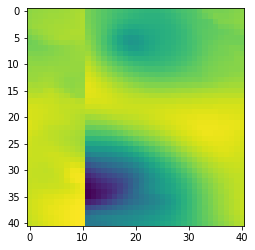

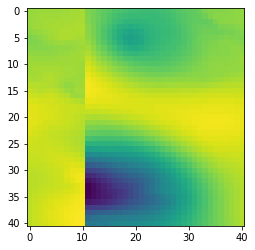

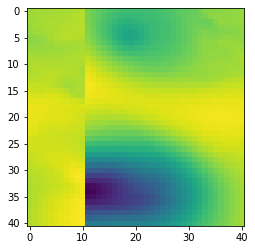

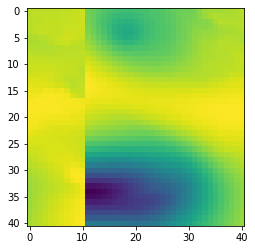

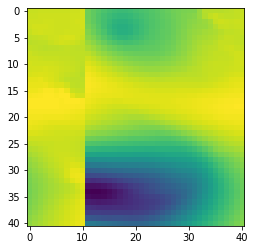

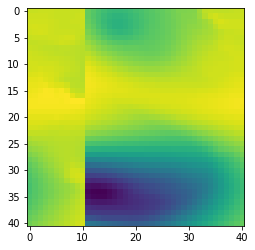

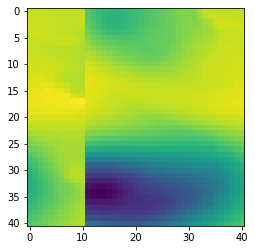

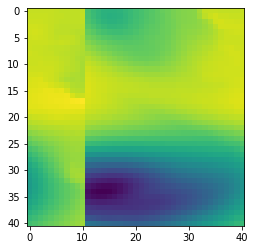

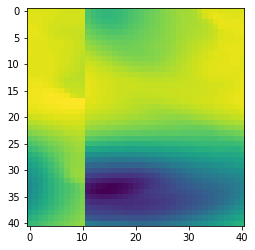

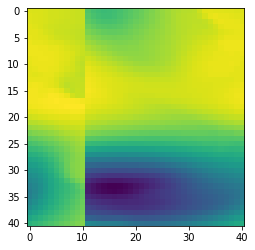

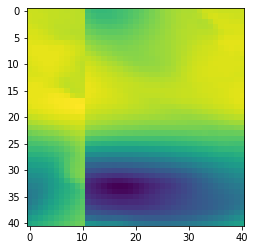

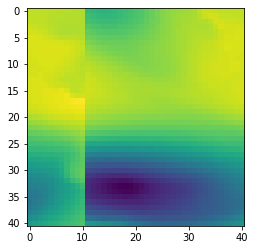

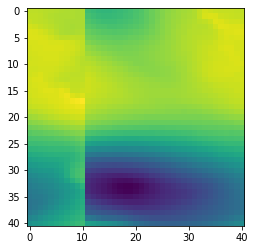

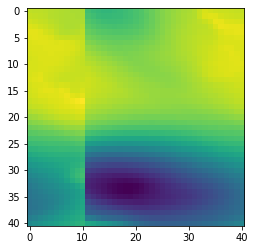

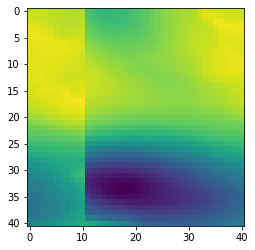

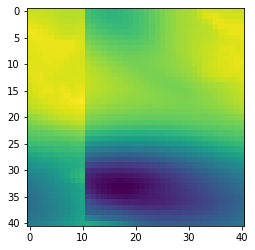

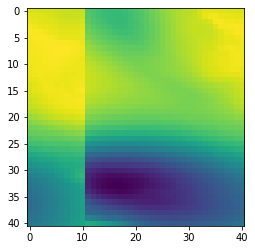

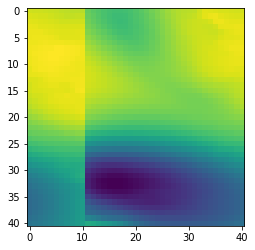

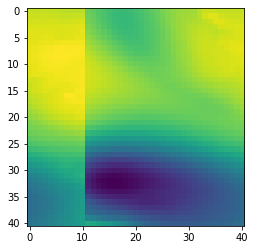

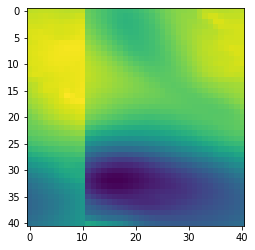

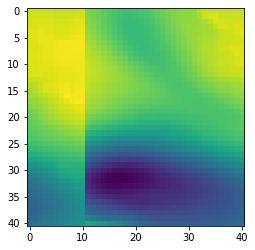

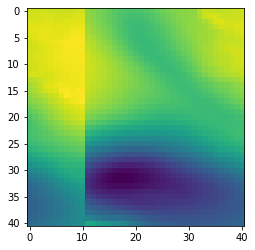

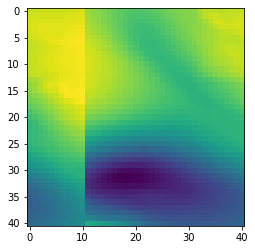

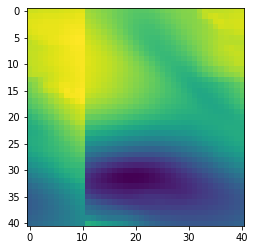

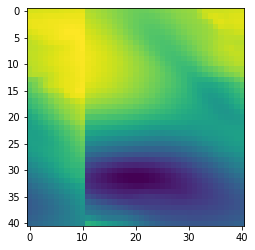

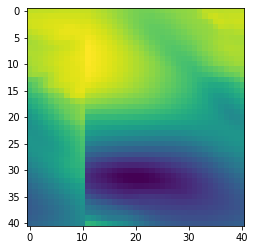

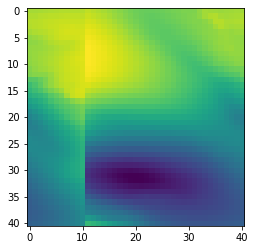

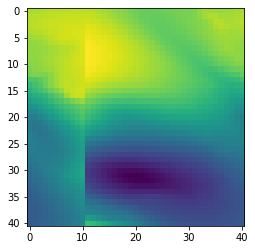

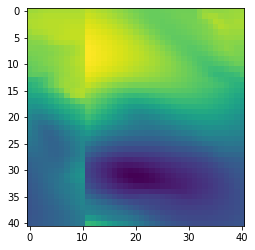

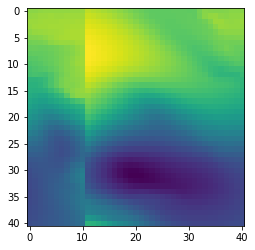

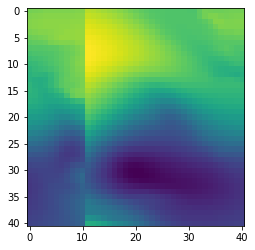

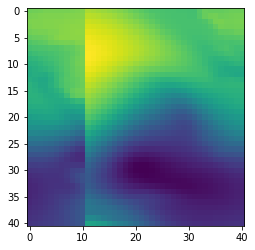

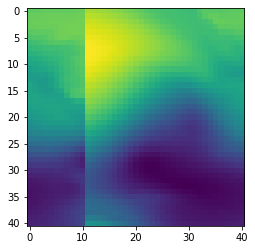

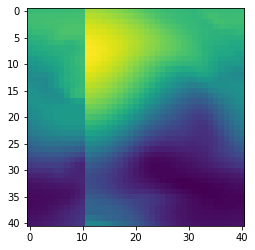

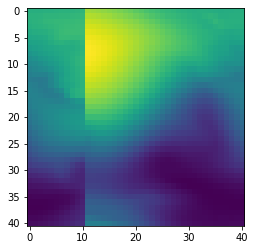

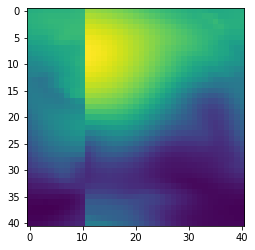

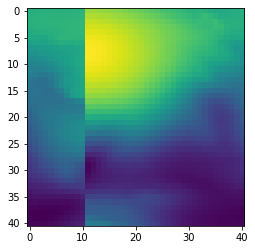

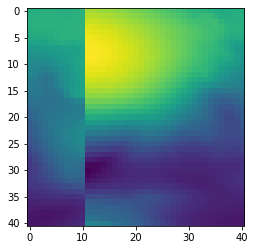

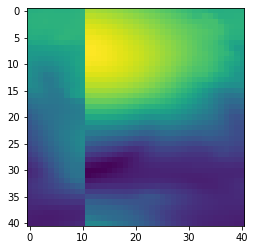

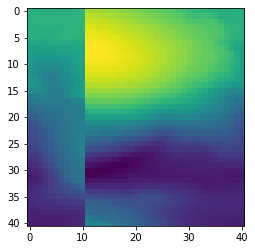

In [53]:
entry = slp_train[100]
for j in entry:
    plt.imshow(j)
    plt.show()

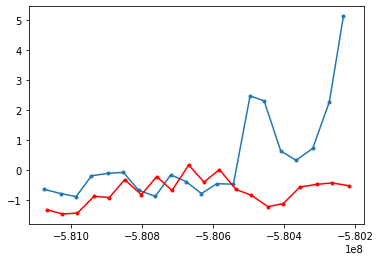

In [68]:
a=540
plt.plot(t_surge1_input_train_set[a:a+20],surge1_input_train_set[a:a+20], marker='.')
plt.plot(t_surge2_input_train_set[a:a+20],surge2_input_train_set[a:a+20], marker='.', color='red')

In [47]:
t_diff_cities = (np.array(t_surge2_input_train_set)-np.array(t_surge1_input_train_set))/3600

In [51]:
max(t_diff_cities)

5.0133333

In [56]:
t_surge1_input_train_set[13140]

1080673200.0

In [66]:
surge2_input_train_set[1000]

-1.0932904481887817

In [55]:
time.gmtime(1080691200.0)

time.struct_time(tm_year=2004, tm_mon=3, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=91, tm_isdst=0)

In [57]:
time.gmtime(1080673200.0)

time.struct_time(tm_year=2004, tm_mon=3, tm_mday=30, tm_hour=19, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=90, tm_isdst=0)

In [53]:
np.where(t_diff_cities==5.0133333)

(array([13140], dtype=int64),)

In [27]:
surge_diff_cities = (surge1_input_train_set - surge2_input_train_set)

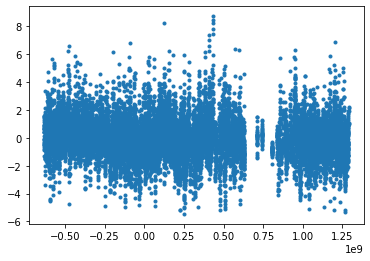

In [28]:
plt.scatter(t_surge2_input_train_set, surge_diff_cities, marker='.' )

In [16]:
np.mean(t_diff_cities)

1.9762228

In [17]:
min(surge1_input_train_set)

-2.9692142009735107

In [18]:
time.gmtime(int(t_surge1_input_train_set[-1006]))

time.struct_time(tm_year=2008, tm_mon=2, tm_mday=8, tm_hour=15, tm_min=0, tm_sec=16, tm_wday=4, tm_yday=39, tm_isdst=0)

In [120]:
list(surge1_input_train_set).index(7.608740329742432)

14250

In [125]:
surge2_input_train_set[14250]

0.742432177066803

In [127]:
t_surge1_input_train_set[14250]

1201856400.0

In [129]:
t_surge1_input_train[0]

array([-6.311088e+08, -6.310656e+08, -6.310188e+08, -6.309756e+08,
       -6.309288e+08, -6.308856e+08, -6.308424e+08, -6.307992e+08,
       -6.307524e+08, -6.307092e+08], dtype=float32)

In [130]:
t_surge2_input_train[0]

array([-6.311016e+08, -6.310584e+08, -6.310152e+08, -6.309684e+08,
       -6.309252e+08, -6.308820e+08, -6.308352e+08, -6.307920e+08,
       -6.307488e+08, -6.307020e+08], dtype=float32)

In [146]:
time.gmtime(int(t_surge1_input_train[4000][0]))

time.struct_time(tm_year=1988, tm_mon=1, tm_mday=9, tm_hour=16, tm_min=59, tm_sec=44, tm_wday=5, tm_yday=9, tm_isdst=0)

In [118]:
for i in surge1_input_train_set:
    if i>7:
        print(i)

7.608740329742432


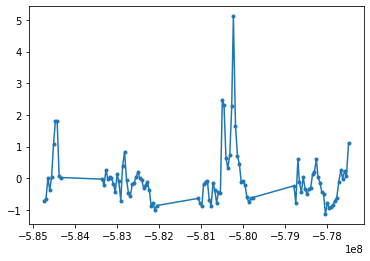

In [82]:
a=500
plt.plot(t_surge1_input_train_set[a:a+100],surge1_input_train_set[a:a+100], marker='.')

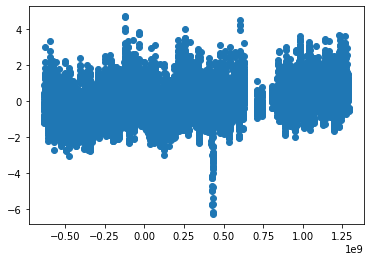

In [116]:
plt.scatter(t_surge2_input_train_set,surge2_input_train_set)

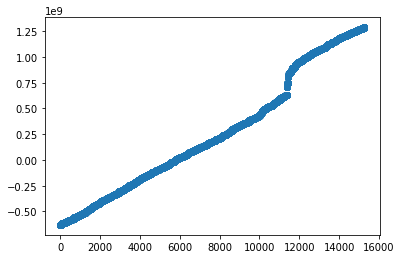

In [103]:
plt.scatter(range(len(t_surge2_input_train_set)), t_surge2_input_train_set)

In [ ]:
t_slp_test_set = set()
for j in t_slp_test:
    for i in j:
        t_slp_test_set.add(i)
t_slp_test_set=sorted(list(t_slp_test_set))

In [88]:
len(set.intersection(set(t_slp_test_set), set(t_slp_train_set)))

1121

In [90]:
len(t_slp_test_set)

20360

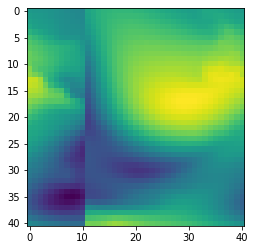

In [61]:
plt.imshow(slp_train[0][10])

## Benchmark
Train using kNN of pressure fields at two instants in time, with 40 neighbours

In [62]:
nfields = 2; time_step_slp = 8
slp_train = []
slp_all = X_train['slp']
for i in range(5559):
    slp_train.append(np.ndarray.flatten(slp_all[i,-1]))
    for j in range(1,nfields):
        slp_train[-1] = np.concatenate( ( slp_train[-1], np.ndarray.flatten(slp_all[i,-1-j*time_step_slp]) ) )
slp_train = np.array(slp_train)

In [63]:
slp_test = []
slp_all_test = X_test['slp']
for i in range(509):
    slp_test.append(np.ndarray.flatten(slp_all_test[i,-1]))
    for j in range(1,nfields):
        slp_test[-1] = np.concatenate( ( slp_test[-1], np.ndarray.flatten(slp_all_test[i,-1-j*time_step_slp]) ) )
slp_test = np.array(slp_test)

In [8]:
tree = BallTree(slp_train)

In [9]:
surge_test_benchmark = []; k = 40
for i in range(509):
    dist, ind = tree.query([slp_test[i]], k=k)
    surge_test_benchmark.append(np.mean(surge_train[ind[0]], axis=0))
surge_test_benchmark = np.array(surge_test_benchmark)

In [10]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
y_test_benchmark = pd.DataFrame(data=surge_test_benchmark, columns=y_columns, index=X_test['id_sequence'])
y_test_benchmark.to_csv('Y_test_benchmark.csv', index_label='id_sequence', sep=',')

#  trials

In [19]:
from tsai.all import *
computer_setup()

os             : Windows-10-10.0.22000-SP0
python         : 3.9.10
tsai           : 0.3.0
fastai         : 2.5.3
fastcore       : 1.3.29
torch          : 1.10.2+cpu
n_cpus         : 16
device         : cpu


In [20]:
#export
from tsai.imports import *
from tsai.utils import *
from tsai.models.layers import *
from tsai.models.utils import *

In [17]:
#exporti
class _MultiHeadAttention(Module):
    def __init__(self, d_model:int, n_heads:int, d_k:int, d_v:int):
        r"""
        Input shape:  Q, K, V:[batch_size (bs) x q_len x d_model], mask:[q_len x q_len]
        """
        self.n_heads, self.d_k, self.d_v = n_heads, d_k, d_v
        
        self.W_Q = nn.Linear(d_model, d_k * n_heads, bias=False)
        self.W_K = nn.Linear(d_model, d_k * n_heads, bias=False)
        self.W_V = nn.Linear(d_model, d_v * n_heads, bias=False)
        
        self.W_O = nn.Linear(n_heads * d_v, d_model, bias=False)

    def forward(self, Q:Tensor, K:Tensor, V:Tensor, mask:Optional[Tensor]=None):
        
        bs = Q.size(0)

        # Linear (+ split in multiple heads)
        q_s = self.W_Q(Q).view(bs, -1, self.n_heads, self.d_k).transpose(1,2)       # q_s    : [bs x n_heads x q_len x d_k]
        k_s = self.W_K(K).view(bs, -1, self.n_heads, self.d_k).permute(0,2,3,1)     # k_s    : [bs x n_heads x d_k x q_len] - transpose(1,2) + transpose(2,3)
        v_s = self.W_V(V).view(bs, -1, self.n_heads, self.d_v).transpose(1,2)       # v_s    : [bs x n_heads x q_len x d_v]

        # Scaled Dot-Product Attention (multiple heads)
        context, attn = _ScaledDotProductAttention(self.d_k)(q_s, k_s, v_s)          # context: [bs x n_heads x q_len x d_v], attn: [bs x n_heads x q_len x q_len]

        # Concat
        context = context.transpose(1, 2).contiguous().view(bs, -1, self.n_heads * self.d_v) # context: [bs x q_len x n_heads * d_v]

        # Linear
        output = self.W_O(context)                                                  # context: [bs x q_len x d_model]
        
        return output, attn

In [18]:
#exporti
class _ScaledDotProductAttention(Module):
    def __init__(self, d_k:int): self.d_k = d_k
    def forward(self, q:Tensor, k:Tensor, v:Tensor, mask:Optional[Tensor]=None):

        # MatMul (q, k) - similarity scores for all pairs of positions in an input sequence
        scores = torch.matmul(q, k)                                         # scores : [bs x n_heads x q_len x q_len]
        
        # Scale
        scores = scores / (self.d_k ** 0.5)
        
        # Mask (optional)
        if mask is not None: scores.masked_fill_(mask, -1e9)
        
        # SoftMax
        attn = F.softmax(scores, dim=-1)                                    # attn   : [bs x n_heads x q_len x q_len]
        
        # MatMul (attn, v)
        context = torch.matmul(attn, v)                                     # context: [bs x n_heads x q_len x d_v]
        
        return context, attn

# LSTM

In [10]:
slp_train.shape

(5599, 40, 41, 41)

In [11]:
trainX = torch.zeros(5599, 10, 8415)

In [ ]:
for entry in range(5599):
    trainX[entry] = 

In [36]:
seq_length = 4

In [37]:
def loss_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    return surge1_score 

In [38]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [48]:
trainX1 = Variable(torch.Tensor([np.array(surge1_input_train)]))


In [49]:
torch.flip(trainX1, [(0,1)])

TypeError: flip(): argument 'dims' (position 2) must be tuple of ints, not list

In [41]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
   
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = loss_metric(Y_train, outputs)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

RuntimeError: input must have 3 dimensions, got 2

In [21]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
y_test_benchmark = pd.DataFrame(data=surge_test_benchmark, columns=y_columns, index=X_test['id_sequence'])
y_test_benchmark.to_csv('Y_test_benchmark.csv', index_label='id_sequence', sep=',')

,id_sequence,surge1_t0,surge1_t1,surge1_t2,surge1_t3,surge1_t4,surge1_t5,surge1_t6,surge1_t7,surge1_t8,...,surge2_t0,surge2_t1,surge2_t2,surge2_t3,surge2_t4,surge2_t5,surge2_t6,surge2_t7,surge2_t8,surge2_t9
0,1,0.586936,1.069580,0.767928,-0.100162,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,...,-0.053886,0.356847,0.348464,0.264641,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057
1,2,0.767928,-0.100162,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,...,0.348464,0.264641,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703
2,3,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,...,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733
3,4,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,-0.726929,-0.576103,...,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733,-0.473001,-0.422707
4,5,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,-0.726929,-0.576103,1.160076,0.442813,...,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733,-0.473001,-0.422707,-0.473001,-0.531677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,5595,1.451674,1.220407,0.556771,1.709754,0.483033,0.533309,1.448322,1.820360,1.662831,...,0.759197,0.884931,0.298171,-0.397560,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700
5595,5596,0.556771,1.709754,0.483033,0.533309,1.448322,1.820360,1.662831,1.528763,1.284089,...,0.298171,-0.397560,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223
5596,5597,0.483033,0.533309,1.448322,1.820360,1.662831,1.528763,1.284089,0.070775,0.888589,...,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223,1.446545,2.670360
5597,5598,1.448322,1.820360,1.662831,1.528763,1.284089,0.070775,0.888589,1.545521,1.166779,...,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223,1.446545,2.670360,2.620066,2.678742
